In [100]:
import nibabel
import scipy.misc
from nilearn import plotting
from nilearn.datasets import MNI152_FILE_PATH
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [20, 10]

In [126]:
img = nibabel.load('/home/anya/Documents/sem6/kursach/init_data/case-5eb926ce-b138-4cb6-84f8-f9805724339d/CT_body.nii.gz')
img_data = img.get_fdata()
img_data.shape

(512, 512, 115)

In [127]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower", vmin=0, vmax=15)

Text(0.5,0.98,'Center slices for EPI image')

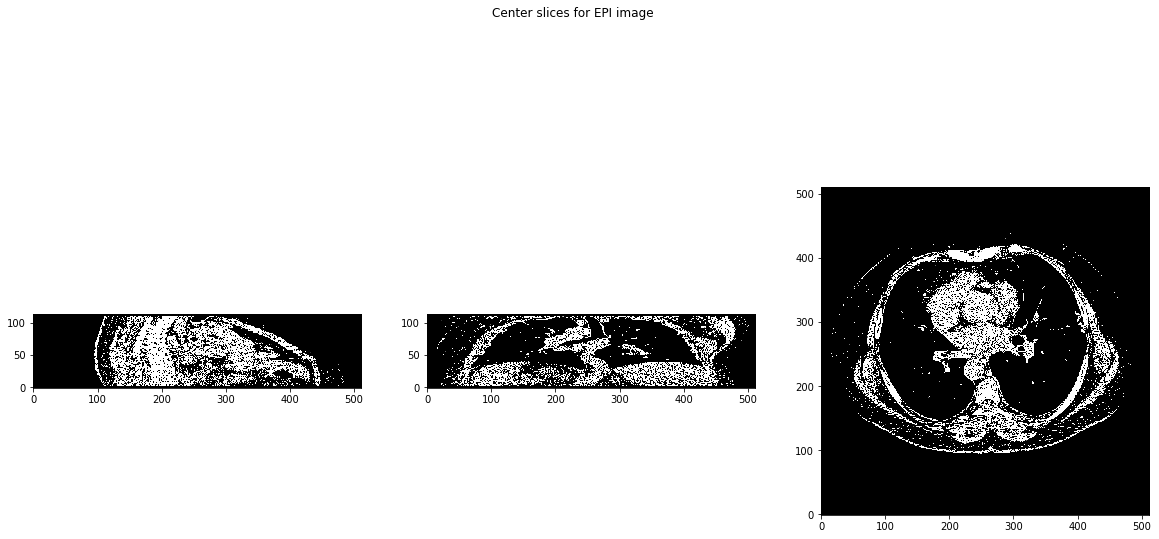

In [128]:
slice_0 = img_data[250, :, :]
slice_1 = img_data[:, 250, :]
slice_2 = img_data[:, :, 60]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")

In [129]:
img.affine #pixels to mm

array([[   0.79492199,    0.        ,    0.        ,  203.5       ],
       [   0.        ,    0.79492199,    0.        , -231.70513916],
       [   0.        ,    0.        ,    2.5       , -272.75      ],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

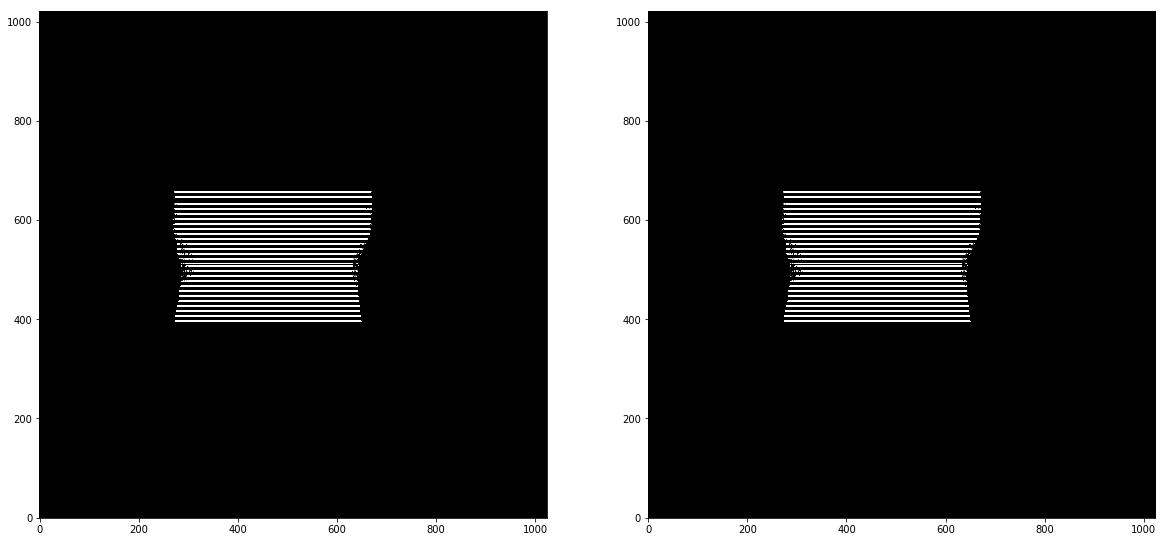

In [157]:
result = np.zeros((1024, 1024))

for x in range(0, img_data.shape[0], 1):
    for y in range(0, img_data.shape[1], 1):
        for z in range(0, img_data.shape[2], 1):
            if not img_data[x, y, z]:
                continue
            world = np.dot(img.affine, np.array([x, y, z, 1]))
            #projection
            new_x = int(round(world[0])) + 64
            new_y = int(round(world[2])) + 656
            intensity = img_data[x, y, z]
            intensity = max(0, intensity)
            
            #result[new_x, new_y] = max(result[new_x, new_y], intensity)
            result[new_x, new_y] += intensity * 0.1

show_slices([result, result])            

# scipy.misc.imsave('outfile2_detailed_bright2.png', result)